In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("zmvm.xlsx")


# Selecciona solo las columnas numéricas a partir de la columna 3
columnas_numericas = df.columns[2:]
datos = df[columnas_numericas]



means = datos.mean()

stds = datos.std()

normalized_datos = (datos - means) / stds

weights = np.ones(datos.shape[1]) / datos.shape[1]

weights1 = [1.5, 1.5, 1.5, 1, 1, 1.5, 1, 1.5,1.5,1,1.5,1,1,1,1,1,1,1,1,1,1,1,1,1]  # Peso para cada columna
weights2=weights*weights1

weighted_scores = np.dot(normalized_datos.values, weights2)

df["Weighted Score"] = weighted_scores

df_sorted = df.sort_values(by="Weighted Score", ascending=False)

"""print(df_sorted)
x = df_sorted.iloc[:, 1]  # Segunda columna (nombres)
y = df_sorted.iloc[:, -1]  # Última columna
plt.scatter(x, y)
plt.xlabel('Municipios')
plt.ylabel('Puntaje ponderado')

plt.xticks(rotation=90)

x_subset = x[:9]
y_subset = y[:9]

plt.scatter(x_subset, y_subset)"""




"print(df_sorted)\nx = df_sorted.iloc[:, 1]  # Segunda columna (nombres)\ny = df_sorted.iloc[:, -1]  # Última columna\nplt.scatter(x, y)\nplt.xlabel('Municipios')\nplt.ylabel('Puntaje ponderado')\n\nplt.xticks(rotation=90)\n\nx_subset = x[:9]\ny_subset = y[:9]\n\nplt.scatter(x_subset, y_subset)"

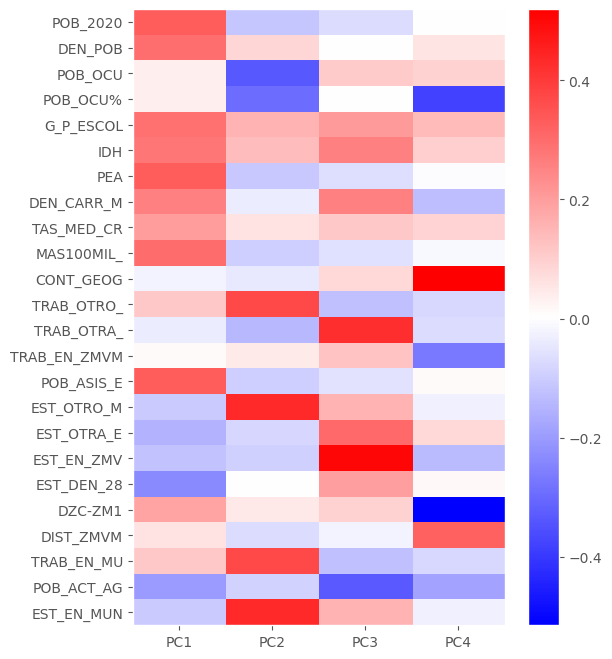

C:\Users\jesus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [131]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

df = pd.read_excel("zmvm.xlsx")

rango=4
pca_pipe = make_pipeline(StandardScaler(), PCA(rango))
pca_pipe.fit(datos)

modelo_pca = pca_pipe.named_steps['pca']


pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    #index   = range('PC1', 'PC2', 'PC3', 'PC4')
    index   = range(1, modelo_pca.components_.shape[0] + 1)
)
componentes = modelo_pca.components_

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))
plt.imshow(componentes.T, cmap='bwr', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(rango), ['PC1', 'PC2', 'PC3', 'PC4'])
plt.grid(False)
plt.colorbar()
plt.show()

indices_componentes = modelo_pca.transform(datos)
df_componentes = pd.DataFrame(indices_componentes, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Guardar el DataFrame en un archivo Excel
df_componentes.to_excel('componentes_principales_4_s.xlsx', index=False)